In [19]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# get pandas data frame
data = pd.read_csv("mnist_train_small.csv")
data.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)

# divide data into features and labels
features = data[:,1:]/255
labels = data[:,0]
num = np.arange(10)
ones = np.ones((features.shape[0],1),dtype =np.uint8)
new_features = np.c_[features,ones]

In [23]:
def init():
    w1 = np.random.rand(28,784) - 0.5
    b1 = np.random.rand(28,1) - 0.5
    w2 = np.random.rand(10,28) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1,b1,w2,b2
    
def predict(x,w):
    return x.dot(w)

def RELU(data):
    return np.array([max(0.0,x) for x in data])

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def compute_nodes(x,weight):
    layers = np.empty((len(weight)))
    for i in range(len(weight)):
        w = weight[i] 
        layers[i] = predict(x,w)
    return layers

def backpropagation(a2,weight2,a1,weight1,y,z1,x):
    a1 = a1[:,:-1].reshape(-1,1)
    w2 = weight2[:,:-1]
    b2 = weight2[:,-1]
    w1 = weight1[:,:-1]
    b1 = weight1[:,-1]
    x = x[:-1].reshape(-1,1)
    
    dz2 = a2 - y
    dw2 = dz2.dot(a1.T)
    db2 = np.sum(dz2)
    dz1 = w2.T.dot(dz2) * ReLU_deriv(z1)
    dw1 = dz1.dot(x.T)
    db1 = np.sum(dz1)
    
    return dw1, db1, dw2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def compute_loss(y,y_hat):
    loss = 0
    for i in range(len(y)):
        loss += -y[i][0]*np.log(y_hat[i][0])
        
    return loss
    
def main(features,labels,learning_rate,epochs):  
    losses = []
    w1,b1,w2,b2 = init()
    weight1 = np.concatenate((w1,b1),axis = 1)
    weight2 = np.concatenate((w2,b2),axis = 1)
    hidden_nodes = np.empty((len(weight1),1))
    output = np.empty((len(weight2),1))
    
    for epoch in range(epochs):
        acc = 0
        loss = 0
        for i in range(len(features)):
            
            # initial some parameters
            l = np.zeros((10,1))
            x = features[i]
            y = labels[i]
            l[y] = 1.0
            
            hidden_nodes = compute_nodes(x,weight1)
            hidden_nodes_b = np.append(RELU(hidden_nodes),1).reshape(1,-1)
            z1 = hidden_nodes.reshape(-1,1)

            output = softmax(compute_nodes(hidden_nodes_b,weight2)).reshape(10,1)
            
            dw1, db1, dw2, db2 = backpropagation(output,weight2,hidden_nodes_b,weight1,l,z1,x)
            w1,b1,w2,b2 = update_params(weight1[:,:-1], weight1[:,-1], weight2[:,:-1], weight2[:,-1], dw1, db1, dw2, db2, learning_rate)
            
            weight2[:,:-1] = w2
            weight2[:,-1] = b2
            weight1[:,:-1] = w1
            weight1[:,-1] = b1
            
            loss += compute_loss(l,output)
            
            if y == np.argmax(output,0):
                acc += 1
            
        losses.append(loss/len(features))
        print(f"Epoch: {epoch+1}/{epochs} accuracy: {acc/len(features)}  loss: {losses[epoch]}")
    return weight1,weight2,losses
    
    
learning_rate = 1e-2
epochs = 20
weight1,weight2,losses = main(new_features,labels,learning_rate,epochs)

Epoch: 1/20 accuracy: 0.8495424771238562  loss: 0.48891013996721694
Epoch: 2/20 accuracy: 0.920546027301365  loss: 0.2655466446866104
Epoch: 3/20 accuracy: 0.9347967398369919  loss: 0.21026941589702772
Epoch: 4/20 accuracy: 0.9457472873643682  loss: 0.17862312197060415
Epoch: 5/20 accuracy: 0.9536976848842442  loss: 0.15525316854348054
Epoch: 6/20 accuracy: 0.9581979098954948  loss: 0.13727377720742315
Epoch: 7/20 accuracy: 0.9615980799039952  loss: 0.12274428786568946
Epoch: 8/20 accuracy: 0.9656982849142457  loss: 0.10907096015841101
Epoch: 9/20 accuracy: 0.9702985149257463  loss: 0.09699721047116648
Epoch: 10/20 accuracy: 0.9742487124356218  loss: 0.08817877264630394
Epoch: 11/20 accuracy: 0.9751987599379969  loss: 0.08014536647813059
Epoch: 12/20 accuracy: 0.9789489474473724  loss: 0.0712441436253774
Epoch: 13/20 accuracy: 0.9808490424521226  loss: 0.06503617301442403
Epoch: 14/20 accuracy: 0.9815990799539978  loss: 0.05927036705029447
Epoch: 15/20 accuracy: 0.9836991849592479  los

In [135]:
# predict
def predict_test(x_feature,y_label):
    hidden_nodes = compute_nodes(x_feature,weight1)
    hidden_nodes_b = np.append(RELU(hidden_nodes),1).reshape(1,-1)
    output = softmax(compute_nodes(hidden_nodes_b,weight2)).reshape(10,1)
    
    print(y_label)
    return num[np.argmax(output)]

print(predict_test(new_features[0],labels[0]))

5
5


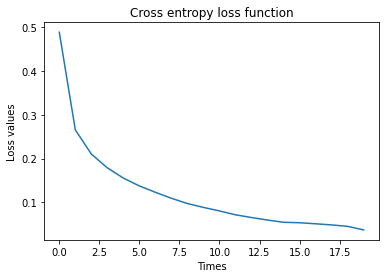

In [40]:
x_axis = np.arange(20)

fig = plt.figure("Loss function")

plt.title("Cross entropy loss function")
plt.xlabel("Times")
plt.ylabel("Loss values")
plt.plot(x_axis, losses)
plt.show()

In [25]:
with open("weight1.npy",'wb') as file:
    np.save(file,weight1)
    
with open("weight2.npy",'wb') as file:
    np.save(file,weight2)